# Initialize


In [18]:
# What version of Python do you have?
import sys

import pandas as pd
import sklearn as sk
import tensorflow as tf
from matplotlib import pyplot as plt
import keras


print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.11.0
Keras Version: 2.11.0

Python 3.8.10 (default, Jun 22 2022, 20:18:18) 
[GCC 9.4.0]
Pandas 1.5.1
Scikit-Learn 1.1.3
GPU is NOT AVAILABLE


# Load Data

In [19]:
from sklearn.model_selection import train_test_split

In [42]:
X_train = pd.read_csv('../Data/traincleaned.csv')
X_test = pd.read_csv('../Data/testcleaned.csv')

y_train = X_train.pop('median_house_value')
y_test = X_test.pop('median_house_value')


# Generate a subset for testing
# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1)

# Define and Compile Model

In [28]:
from keras import layers

In [51]:
def create_model():
    model = keras.Sequential([    
        keras.Input(shape=(13,)),
        keras.layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='softmax'),
        keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam()

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [52]:
# Train the data to use the df to predict y
model = create_model()
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
549/549 [==============================] - 3s 3ms/step - loss: 0.4246 - mae: 0.4677 - mse: 0.4246
Epoch 2/100
549/549 [==============================] - 2s 3ms/step - loss: 0.2817 - mae: 0.3737 - mse: 0.2817
Epoch 3/100
549/549 [==============================] - 1s 3ms/step - loss: 0.2673 - mae: 0.3603 - mse: 0.2673
Epoch 4/100
549/549 [==============================] - 1s 2ms/step - loss: 0.2580 - mae: 0.3530 - mse: 0.2580
Epoch 5/100
549/549 [==============================] - 1s 3ms/step - loss: 0.2520 - mae: 0.3490 - mse: 0.2520
Epoch 6/100
549/549 [==============================] - 2s 3ms/step - loss: 0.2466 - mae: 0.3440 - mse: 0.2466
Epoch 7/100
549/549 [==============================] - 2s 3ms/step - loss: 0.2419 - mae: 0.3405 - mse: 0.2419
Epoch 8/100
549/549 [==============================] - 2s 3ms/step - loss: 0.2388 - mae: 0.3366 - mse: 0.2388
Epoch 9/100
549/549 [==============================] - 2s 3ms/step - loss: 0.2335 - mae: 0.3320 - mse: 0.2335
Epoch 10/1

# Evaluate Performance

97/97 - 1s - loss: 0.1837 - mae: 0.2818 - mse: 0.1837 - 618ms/epoch - 6ms/step
Testing set Mean Abs Error:  0.28
97/97 [==============================] - 0s 3ms/step


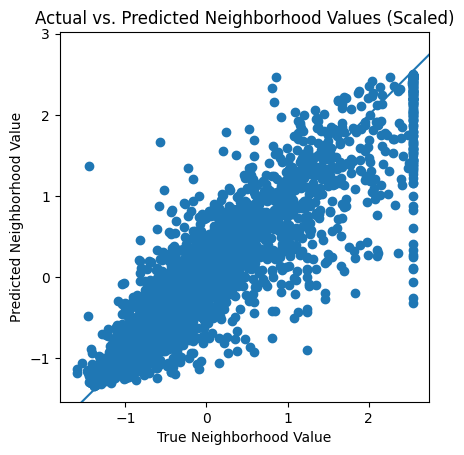

In [53]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

# Make predictions
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.title('Actual vs. Predicted Neighborhood Values (Scaled)')
plt.xlabel('True Neighborhood Value')
plt.ylabel('Predicted Neighborhood Value')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-100, 100], [-100, 100])

# Create a linear regression

In [45]:
# complete a linear regression using the statsmodels library
import statsmodels.api as sm

df = pd.read_csv('../Data/housingcleaned.csv')
y = df.pop('median_house_value')

# create a multivariate linear regression model of the data
# the dependent variable is the 'median_house_value' column
lm = sm.OLS(y, df)

# fit the model to the data
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     530.8
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:25:00   Log-Likelihood:                -2658.7
No. Observations:                3096   AIC:                             5343.
Df Residuals:                    3083   BIC:                             5422.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
longitude                     -0.4537      0.042    -10.749      0.000      -0.536      -0.371
latitude                      -0.4610      0.045    -10.247      0.000      -0.549      -0.373
housing_median_age             0.1135      0.012      9.657      0.000       0.090       0.137
total_rooms                   -0.1826      0.038     -4.758      0.000      -0.258      -0.107
total_bedrooms                 0.3079      0.055      5.572      0.000       0.200       0.416
population                    -0.4674      0.028    -16.558      0.000      -0.523      -0.412
households                     0.3849      0.057      6.770      0.000       0.273       0.496
median_income                  0.6684      0.014     48.123      0.000       0.641       0.696
ocean_proximity_<1H OCEAN      0.1115      0.018      6.110      0.000       0.076       0.147
ocean_proximity_INLAND        -0.2170      0.027     -8.092      0.000      -0.270      -0.164
ocean_proximity_ISLAND         0.4481      0.574      0.781      0.435      -0.677       1.573
ocean_proximity_NEAR BAY       0.0405      0.038      1.079      0.281      -0.033       0.114
ocean_proximity_NEAR OCEAN     0.1453      0.034      4.287      0.000       0.079       0.212
==============================================================================
Omnibus:                      641.846   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1538.149
Skew:                           1.144   Prob(JB):                         0.00
Kurtosis:                       5.586   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Compare Model to LM

In [54]:
# Compute accuracy of the neural network
from sklearn.metrics import r2_score
print("Neural Network R2 Score: ", r2_score(y_test, test_predictions))
print("Linear Regression R2 Score: ", results.rsquared)

Neural Network R2 Score:  0.816898481006914
Linear Regression R2 Score:  0.6738328671015846
